In [1]:
import numpy as np
import math
from tqdm.notebook import tqdm
from functools import cache
import copy

In [2]:
with open("input_day_14.txt") as f:
    text = f.read()


test = False
if test:
    text = """
O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#....
"""
    text = text.strip()



In [3]:
G_strs = text.split("\n")
R = len(G_strs)
C = len(G_strs[0])

G = []
for r_str in G_strs:
    G.append([])
    for c in range(len(r_str)):
        G[-1].append(r_str[c])

original_G = copy.deepcopy(G)

#for row in G:
#    print(row)

for c in range(C):
    #print(c)
    for r in range(R):
        #print("new row", r)
        if G[r][c] == "O":
            curr_r = r
            while curr_r-1 >= 0 and G[curr_r][c] == "O" and G[curr_r-1][c] == ".":
                #print("moving...")
                #print(curr_r, c, "should be set to .")
                G[curr_r][c] = "."
                G[curr_r-1][c] = "O"
                #for row in G:
                #    print(row)
                curr_r -= 1
            #if curr_r != r:
                #print("done moving", r - curr_r, "steps")
                #for row in G:
                #    print(row)

#print("")
#for row in G:
#    print(row)

tot = 0
for r in range(R):
    for c in range(C):
        if G[r][c] == "O":
            #print("found one, adding", )
            tot += R - r

tot



109939

In [4]:
def cycle(G):
    # north
    for c in range(C):
        for r in range(R):
            if G[r][c] == "O":
                curr_r = r
                while curr_r-1 >= 0 and G[curr_r][c] == "O" and G[curr_r-1][c] == ".":
                    G[curr_r][c] = "."
                    G[curr_r-1][c] = "O"
                    curr_r -= 1

    #for row in G: print(row)
    #print("")

    # west
    for r in range(R):
        for c in range(C):
            if G[r][c] == "O":
                curr_c = c
                while curr_c-1 >= 0 and G[r][curr_c] == "O" and G[r][curr_c-1] == ".":
                    G[r][curr_c] = "."
                    G[r][curr_c-1] = "O"
                    curr_c -= 1
    #for row in G: print(row)

    #print(1/0)
    #print("")
    # south
    for c in range(C):
        for r in range(R-1, -1, -1):
            #print(r)
            if G[r][c] == "O":
                curr_r = r
                while curr_r+1 < R and G[curr_r][c] == "O" and G[curr_r+1][c] == ".":
                    G[curr_r][c] = "."
                    G[curr_r+1][c] = "O"
                    curr_r += 1
    #for row in G: print(row)
    #print("")
    # east
    for r in range(R):
        for c in range(C-1, -1, -1):
            if G[r][c] == "O":
                curr_c = c
                while curr_c+1 < C and G[r][curr_c] == "O" and G[r][curr_c+1] == ".":
                    G[r][curr_c] = "."
                    G[r][curr_c+1] = "O"
                    curr_c += 1
    #for row in G: print(row)
    #print("")

    


In [5]:
"""G = copy.deepcopy(original_G)

for row in G: print(row)
print("")
cycle(G)
for row in G: print(row)
print("")
cycle(G)
for row in G: print(row)
print("")
cycle(G)
for row in G: print(row)
print("")
"""

'G = copy.deepcopy(original_G)\n\nfor row in G: print(row)\nprint("")\ncycle(G)\nfor row in G: print(row)\nprint("")\ncycle(G)\nfor row in G: print(row)\nprint("")\ncycle(G)\nfor row in G: print(row)\nprint("")\n'

In [6]:
G = copy.deepcopy(original_G)

loads = []

for cycle_num in range(1000):
    tot = 0
    for r in range(R):
        for c in range(C):
            if G[r][c] == "O":
                tot += R - r
    loads.append(tot)
    cycle(G)


44


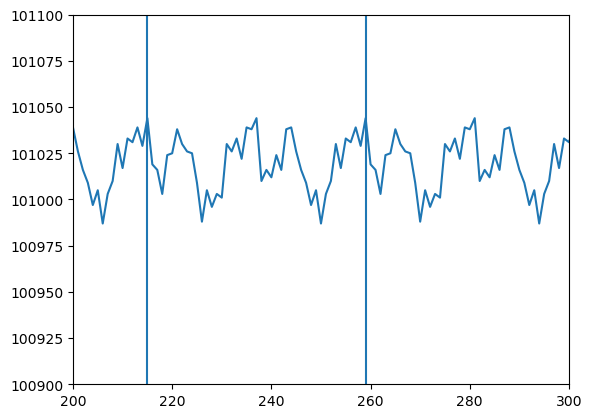

In [10]:
import matplotlib.pyplot as plt

plt.plot(loads)
plt.xlim(200, 300)
plt.ylim(100900, 101100)
plt.axvline(215)
plt.axvline(259)

print(259 - 215)


In [11]:
print(loads[215 + (1000000000 - 215)%44])


101010


In [9]:
# not 101044
# not 101030